In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
plt.rcParams["figure.figsize"] = (4, 4)
from mpl_toolkits.mplot3d import Axes3D

Simulation de systèmes hamiltoniens
==============================

Considérons un système hamiltonien d'état $x=(q,p)\in \mathbb{R}^d \times \mathbb{R}^d$, où $q$ et $p$ sont les positions généralisées et quantités de mouvement respectivement, de dynamique
\begin{align*}
\dot{q} &= f_q(p) \\
\dot{p} &= f_p(q)
\end{align*}
avec
\begin{align*}
f_q(p) &= \nabla_p H(q,p)  \\
f_p(q) &= - \nabla_q H(q,p) 
\end{align*}
où $H: \mathbb{R}^d \times \mathbb{R}^d\to \mathbb{R}$ est le hamiltonien du type
$$
H(p,q) = \frac{1}{2}p^\top M^{-1} p + U(q)
$$
avec $M\in \mathbb{R}^{d\times d}$ la matrice de masses (généralisées) et $U$ un potentiel qui varie selon les applications.

Des exemples typiques de systèmes hamiltoniens sont les systèmes à N corps en interation : planètes en interaction gravitationnelle, particules quantiques en interaction électrostatique, molécules en interaction (potentiel de Lennard-Jones), etc... Dans ce cas, $d$ est égale à N fois la dimension des positions $q_k$ caractérisant chaque corps, avec
$$
q=(q_1,\ldots,q_k,\ldots, q_N) \quad , \quad p=(p_1,\ldots,p_k,\ldots, p_N)
$$
et donc
\begin{align*}
\dot{q}_k &= f_{q_k}(p) = \nabla_{p_k} H(q,p)  \\
\dot{p}_k &= f_{p_k}(q) = - \nabla_{q_k} H(q,p) 
\end{align*}
$M$ est typiquement diagonale contenant la masse de chaque corps, et $U$ est de la forme
$$
U(q) = \sum_{1\leq l < k\leq N} \varphi(\|q_k-q_l\|)
$$
où $\varphi : \mathbb{R} \to \mathbb{R}$ dépend de l'application.

**Question 1** Montrer qu'alors
$$
\dot{q}_k = f_{q_k}(p) = \frac{1}{m_k} p_k \qquad , \qquad  \dot{p}_k = f_{p_k}(q) = -\sum_{l \neq k} \varphi'(\|q_k-q_l\|)\frac{q_k-q_l}{\|q_k-q_l\|}
$$

**Réponse :** On prend M une matrice diagonale, on obtient avec $p = (p_1,\ldots,p_i,\ldots, p_N)$ :
$$H(q,p) = U(q) + \frac{1}{2}p^\top M^{-1} p  = U(q) +\sum_{1 \leq i \leq N} \frac{||p_i||^2}{m_i} $$


En utlisant les équations de Lagrange, on a :
$$
\dot{q}_k = \nabla_{p_k} H(q,p)  = \nabla_{p_k}U(q) + \frac{1}{2}\sum_{1 \leq i \leq N}\frac{1}{m_i}\nabla_{p_k}||p_i||^2
$$
Or le potentiel dépend seulement de q, on a ainsi :
$$
\dot{q}_k = \frac{1}{2m_k}\nabla_{p_k}||p_k||^2 
$$
Donc    $$\dot{q}_k = f_{q_k}(p) = \frac{1}{m_k}p_k  $$


Pour prouver la seconde égalité, les termes en p étant indépendants de q, on a : $$\dot{p}_k = f_{p_k}(q) = -\nabla_{q_k}U(q)$$ 

Donc $$ \nabla_{q_k}(\varphi_{kl}(\|q_k-q_l\|)) = \frac{q_k-q_l}{\|q_k-q_l\|}\varphi_{kl}'(\|q_k-q_l\|)
$$

Ainsi, en utlisant l'expression de $U(q)$
$$
\dot{p}_k = -\sum_{1\leq l < k\leq N} \nabla_{q_k}(\varphi_{kl}(\|q_k-q_l\|))
$$


Finalement :
$${\dot{p}_k = f_{p_k}(q) = -\sum_{l \neq k} \varphi_{kl}'(\|q_k-q_l\|)\frac{q_k-q_l}{\|q_k-q_l\|}}$$

**Question 1 Suite :** Vérifier par le calcul que $H$ est conservée le long des trajectoires.

**Réponse :** Montrons que la dérivée de l'Hamiltonien par rapport est temps est constante :

$$
\frac{dH(q(t),p(t))}{dt} = \sum_k \frac{\partial H}{\partial p_k}\frac{dp_k}{dt} +\frac{\partial H}{\partial q_k}\frac{dq_k}{dt}
$$
Or on a :
$ \frac{dq_k}{dt} = \frac{\partial H}{\partial p_k} $ et $ \frac{dp_k}{dt} = - \frac{\partial H}{\partial q_k} $


Donc  pour tout $ k \in [1...N] $ :
$$
\frac{\partial H}{\partial p_k}\frac{dp_k}{dt} +\frac{\partial H}{\partial q_k}\frac{dq_k}{dt} = 0
$$
Ainsi
$$
{\frac{dH(q(t),p(t))}{dt} = 0}
$$

L'Hamiltonien est donc conservé le long des trajectoires.

**Question 2**
On propose de simuler plusieurs planètes en interaction gravitationnelle. Choisir un des deux scénarios suivants :
- mouvement planaire de deux planètes dans $\mathbb{R}^2$ (problème de Kepler à deux corps)
- système solaire à $N$ planètes dans $\mathbb{R}^3$.

et définir les fonctions $U$, $H$, $f_q$, $f_p$ et $f=(f_q,f_p)$ correspondantes. Nous vous donnons ci-dessous les paramètres à utiliser pour la simulation dans chacun des deux scénarios.


In [2]:
# EXAMPLE 2 : SOLAR SYSTEM
N = 4  # number of bodies
# if you want to add other planets please use the parameters in the table below extracted from
# [Ernst Hairer, Christian Lubich, Gerhard Wanner, Geometric Numerical Integration Structure-Preserving Algorithms for Ordinary Differential Equations

dim = 3  # dimension of position of each body
d = N * dim

G = 2.95912208286 * 10 ** (-4)
# normalized gravity constant

m_list = np.array(
    [1.00000597682, 0.000954786104043, 0.000285583733151, 0.0000437273164546]
)  # N masses : sun+close planets, jupiter, saturn, uranus (ratio relative to sun)

t0, tf = 0.0, 40000  # in sun days   # with time step dt > 1

q0 = [
    0,
    0,
    0,
    -3.5023653,
    -3.8169847,
    -1.5507963,
    9.0755314,
    -3.0458353,
    -1.6483708,
    8.3101420,
    -16.2901086,
    -7.2521278,
]

p0 = [
    0,
    0,
    0,
    m_list[1] * 0.00565429,
    -m_list[1] * 0.00412490,
    -m_list[1] * 0.00190589,
    m_list[2] * 0.00168318,
    m_list[2] * 0.00483525,
    m_list[2] * 0.00192462,
    m_list[3] * 0.00354178,
    m_list[3] * 0.00137102,
    m_list[3] * 0.00055029,
]

x0 = np.concatenate([q0, p0])

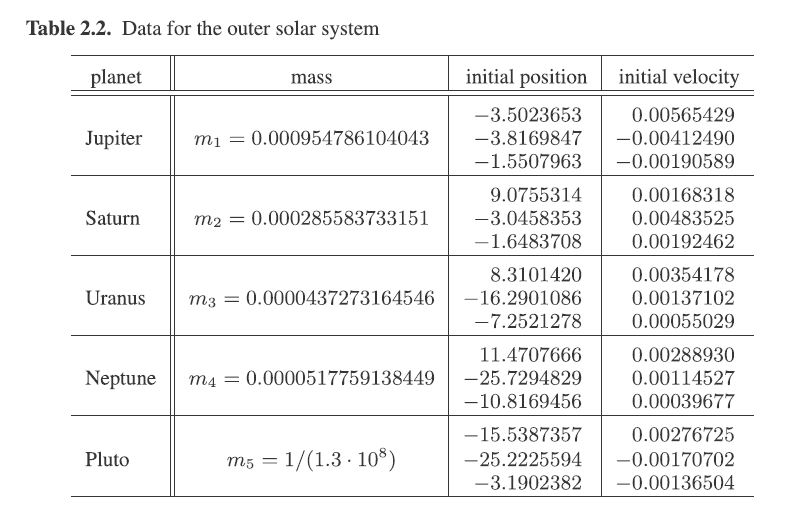

In [3]:
# structure : x = (q, p) = (q1,q2,...,qN, p1,p2,...,pN)
M = np.kron(
    np.diag(m_list), np.eye(dim)
)  # matrix M of dimension d containing the masses
M_inv = np.linalg.inv(M)


def U(q):  # q = (q1,q2,...,qN)
    """arguments: positions des planètes
    sortie : potentiel gravitationnel"""
    U = 0
    for k in range(N):
        for l in range(k):
            mk = M[k * dim][k * dim]
            ml = M[l * dim][l * dim]
            qk = q[k * dim : (k + 1) * dim]
            ql = q[l * dim : (l + 1) * dim]
            distance_kl = np.linalg.norm(qk - ql)
            U += -G * mk * ml / distance_kl
    return U


def H(x):  # x = (q, p) = (q1,q2,...,qN, p1,p2,...,pN)
    """arguments : positions et quantités de mouvement des planètes
    sortie : hamiltonien correspondant"""
    q = np.array(x[:d])
    p = np.array(x[d:])
    return (1 / 2) * np.dot(p.T, np.dot(M_inv, p)) + U(q)


def fq(p):  # p = (p1,p2,...,pN)
    """arguments : quantités de mouvement des planètes
    sortie : fq correspondant"""
    return np.array([p[k] / M[k, k] for k in range(d)])


def fp(q):  # q = (q1,q2,...,qN)
    """arguments : positions des planètes
    sortie : fp correspondant"""
    fp = np.zeros(d)

    for k in range(N):
        fp_k = 0
        for l in range(N):
            q_k = q[k * dim : (k + 1) * dim]
            m_k = M[k * dim][k * dim]
            if l != k:
                q_l = q[l * dim : (l + 1) * dim]
                m_l = M[l * dim][l * dim]
                distance_kl = np.linalg.norm(q_l - q_k)
                fp_k += (-G * m_k * m_l) * ((q_k - q_l) / distance_kl ** 3)
        fp[k * dim : (k + 1) * dim] = fp_k
    return fp


def f(x):
    """arguments: positions et quantités de mouvement des planètes
    sortie : f correspondant"""
    q = x[:d]
    p = x[d:]
    return np.concatenate([fq(p), fp(q)])

In [4]:
# TEST example 2
print(
    f"La première itération de fp renvoie à partir du vecteur initial :\n{fp(np.array([0,0,0,2,3,4,-1,3,4,-1,3,6]))}\n"
)
print(
    f"La première itération de fq renvoie à partir du vecteur initial :\n{fq(np.array([0,0,0,2,3,4,-1,3,4,-1,3,6]))}\n"
)
print(
    f"La première itération de f renvoie à partir du vecteur initial :\n"
    f"{f(np.array([0,0,0,2,3,0,-1,3,5,-1,3,10,0,0,0,0,0,0,0,0,0,0,0,0]))}"
)

La première itération de fp renvoie à partir du vecteur initial :
[ 2.93938599e-09  7.46419184e-09  1.00352049e-08 -3.62805589e-09
 -5.42744994e-09 -7.23607276e-09  6.46404628e-10 -1.91231829e-09
 -2.54883389e-09  4.22652676e-11 -1.24423614e-10 -2.50298205e-10]

La première itération de fq renvoie à partir du vecteur initial :
[     0.              0.              0.           2094.71
   3142.065        4189.42        -3501.59999999  10504.79999998
  14006.39999998 -22868.99999999  68606.99999998 137213.99999997]

La première itération de f renvoie à partir du vecteur initial :
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.16361921e-08  1.93413372e-08  2.15280004e-09 -1.20567899e-08
 -1.80833045e-08  2.14351458e-12  4.09349429e-10 -1.22438537e-09
 -2.04252943e-09  1.12483436e-11 -3.36473241e-11 -1.12414122e-10]


Euler explicite
================

**Question 3** Compléter la fonction ci-dessous prenant en entrée une fonction $f: \mathbb{R}^n \to \mathbb{R}^n$ quelconque, une condition initiale $x_0$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$ du schéma d'Euler explicite appliqué à $\dot{x}=f(x)$. La tester sur une équation différentielle simple aux solutions exactes connues.

In [5]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    """Résout l'équation différentielle par Euler explicite"""
    ts, xs = [t0], [x0]
    while ts[-1] < tf:
        xs.append(f(xs[-1]) * dt + xs[-1])
        ts.append(dt + ts[-1])
    return (np.array(ts), np.array(xs).T)

*__Testons la méthode implémentée sur l'exemple de l'oscillateur harmonique amorti :__*

<IPython.core.display.Javascript object>


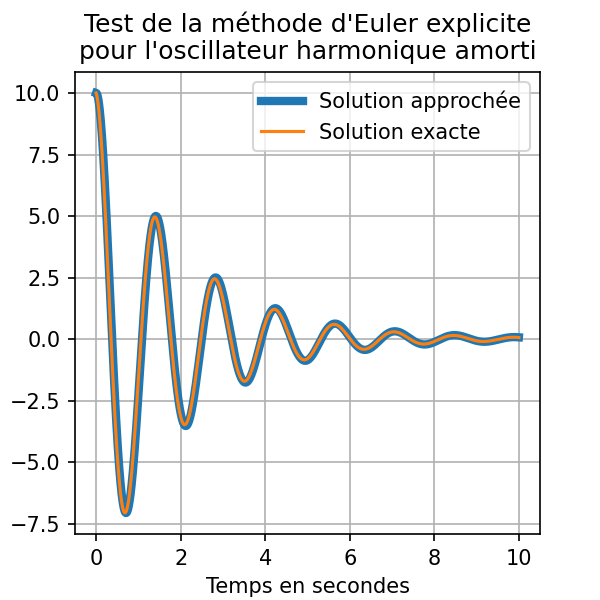

In [6]:
N_test = 1
dt_test = 0.001
t0_test, tf_test = 0.0, 10
dim_test = 1
w0 = np.sqrt(100 / 5)
X0_test = [10, 0]
Q = w0
delta = (w0 / Q) ** 2 - 4 * w0 ** 2


def f_test_oscillateur_amorti(X):
    x = X[0]
    v = X[1]
    return np.array([v, -(w0 ** 2) * x - w0 / Q * v])


T_test, X_test = solve_euler_explicit(
    f_test_oscillateur_amorti, X0_test, dt_test, t0_test, tf_test
)
X_exact = [
    np.exp(-w0 / 2 / Q * t) * (X0_test[0] * np.cos(t / 2 * np.sqrt(-delta)))
    for t in T_test
]

plt.plot(T_test, X_test[0], linewidth=4)
plt.plot(T_test, X_exact)
plt.legend(["Solution approchée", "Solution exacte"])
plt.title("Test de la méthode d'Euler explicite\npour l'oscillateur harmonique amorti")
plt.grid(True)
plt.xlabel("Temps en secondes")
plt.ylabel("Coordonnée spatiale x")
plt.show()

*__La fonction d'implémentation d'Euler explicite fonctionne bien pour cet exemple.__*

**Question 4** Utiliser le schéma d'Euler pour simuler les trajectoires des planètes. Visualiser l'évolution des positions $t\mapsto q(t)$ et du hamiltonien $H$. Ce schéma numérique vous semble-t-il adapté ? Que se passe-t-il lorsque $\Delta t$ tend vers 0 pour un horizon de temps $t_f$ donné ? Et à $\Delta t$ fixé, lorsque $t_f$ augmente ? Commenter.

*__Visualisons la trajectoire des planètes selon la méthode d'Euler explicite.__*

<IPython.core.display.Javascript object>


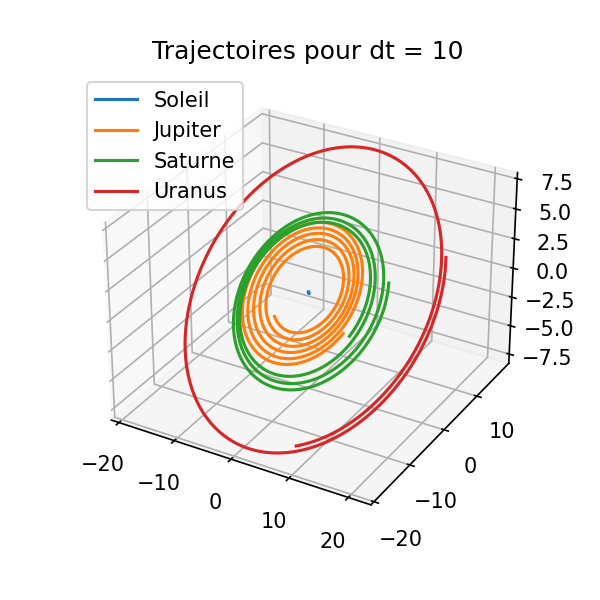

<IPython.core.display.Javascript object>


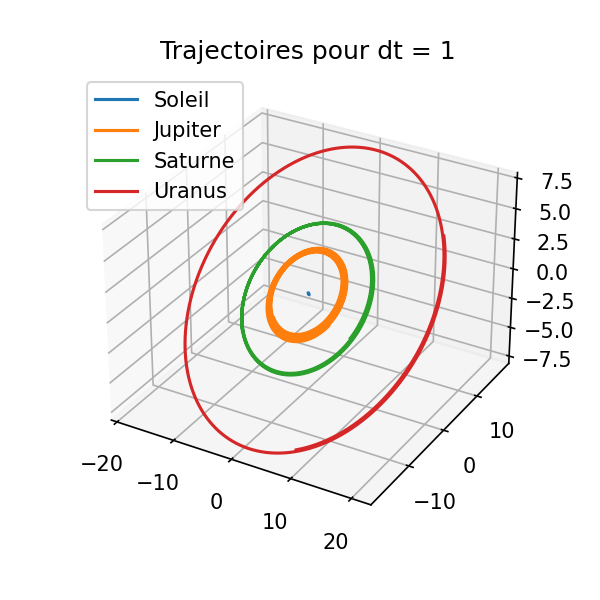

<IPython.core.display.Javascript object>


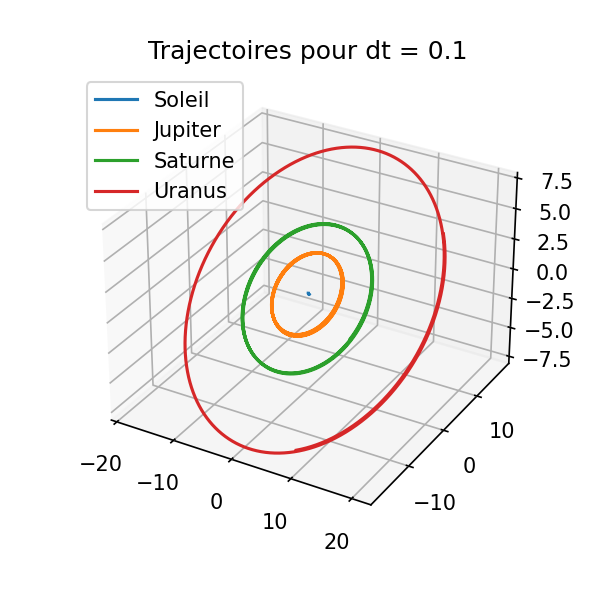

In [7]:
tf = 40000

figure_2 = plt.figure(figsize=[4, 4])
t_explicit_1, x_explicit_1 = solve_euler_explicit(f, x0, 10, t0, tf)

ax = figure_2.add_subplot(projection="3d")
ax.plot3D(*x_explicit_1[0:3], label="Soleil")
ax.plot3D(*x_explicit_1[3:6], label="Jupiter")
ax.plot3D(*x_explicit_1[6:9], label="Saturne")
ax.plot3D(*x_explicit_1[9:12], label="Uranus")
ax.set_title("Trajectoires pour dt = 10")
plt.legend()
plt.show()

figure_3 = plt.figure(figsize=[4, 4])
t_explicit_2, x_explicit_2 = solve_euler_explicit(f, x0, 1, t0, tf)

ax = figure_3.add_subplot(projection="3d")
ax.plot3D(*x_explicit_2[0:3], label="Soleil")
ax.plot3D(*x_explicit_2[3:6], label="Jupiter")
ax.plot3D(*x_explicit_2[6:9], label="Saturne")
ax.plot3D(*x_explicit_2[9:12], label="Uranus")
ax.set_title("Trajectoires pour dt = 1")
plt.legend()
plt.show()

figure_4 = plt.figure(figsize=[4, 4])
t_explicit_3, x_explicit_3 = solve_euler_explicit(f, x0, 0.1, t0, tf)

ax = figure_4.add_subplot(projection="3d")
ax.plot3D(*x_explicit_3[0:3], label="Soleil")
ax.plot3D(*x_explicit_3[3:6], label="Jupiter")
ax.plot3D(*x_explicit_3[6:9], label="Saturne")
ax.plot3D(*x_explicit_3[9:12], label="Uranus")
ax.set_title("Trajectoires pour dt = 0.1")
plt.legend()
plt.show()

*__On remarque que les planètes quittent progressivement leur orbite, sur des échelles de temps relativement courtes.__*

*__Comme on pouvait s'y attendre, réduire le pas de temps se traduit en une meilleure précision sur les positions.__*

*__Ensuite, étudions à dt fixé (valant 10 jours) l'impact de tf :__*

<IPython.core.display.Javascript object>


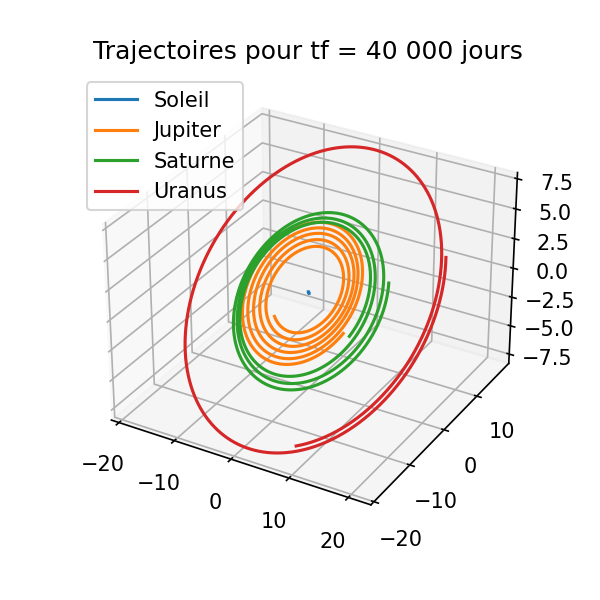

<IPython.core.display.Javascript object>


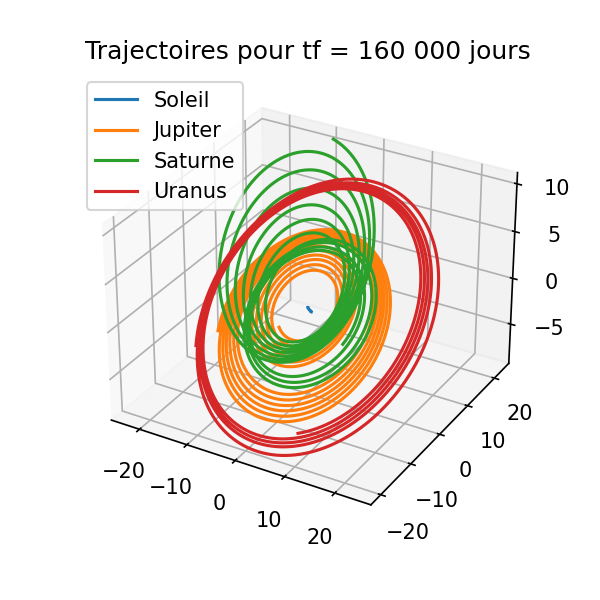

<IPython.core.display.Javascript object>


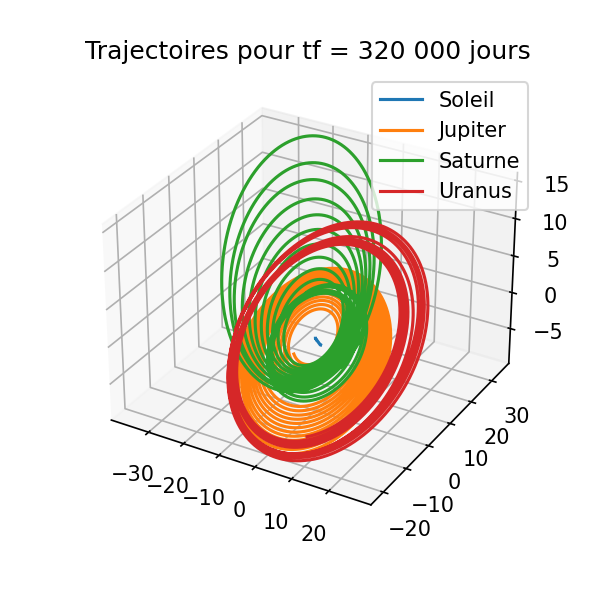

In [8]:
figure_5 = plt.figure(figsize=[4, 4])
t_explicit_4, x_explicit_4 = solve_euler_explicit(f, x0, 10, t0, 40000)
ax = figure_5.add_subplot(projection="3d")
ax.plot3D(*x_explicit_4[0:3], label="Soleil")
ax.plot3D(*x_explicit_4[3:6], label="Jupiter")
ax.plot3D(*x_explicit_4[6:9], label="Saturne")
ax.plot3D(*x_explicit_4[9:12], label="Uranus")
ax.set_title("Trajectoires pour tf = 40 000 jours")
plt.legend()

figure_6 = plt.figure(figsize=[4, 4])
t_explicit_5, x_explicit_5 = solve_euler_explicit(f, x0, 10, t0, 160000)
ax = figure_6.add_subplot(projection="3d")
ax.plot3D(*x_explicit_5[0:3], label="Soleil")
ax.plot3D(*x_explicit_5[3:6], label="Jupiter")
ax.plot3D(*x_explicit_5[6:9], label="Saturne")
ax.plot3D(*x_explicit_5[9:12], label="Uranus")
ax.set_title("Trajectoires pour tf = 160 000 jours")
plt.legend()

figure_7 = plt.figure(figsize=[4, 4])
t_explicit_6, x_explicit_6 = solve_euler_explicit(f, x0, 10, t0, 320000)
ax = figure_7.add_subplot(projection="3d")
ax.plot3D(*x_explicit_6[0:3], label="Soleil")
ax.plot3D(*x_explicit_6[3:6], label="Jupiter")
ax.plot3D(*x_explicit_6[6:9], label="Saturne")
ax.plot3D(*x_explicit_6[9:12], label="Uranus")
ax.set_title("Trajectoires pour tf = 320 000 jours")
plt.legend()
plt.show()

*__Augmenter le temps final ne fait qu'empirer les choses : les planètes s'éloignent de leur orbite voire divergent totalement comme Saturne ou Uranus.__*

*__Approfondissons en passant à l'étude du Hamiltionien__* :

<IPython.core.display.Javascript object>


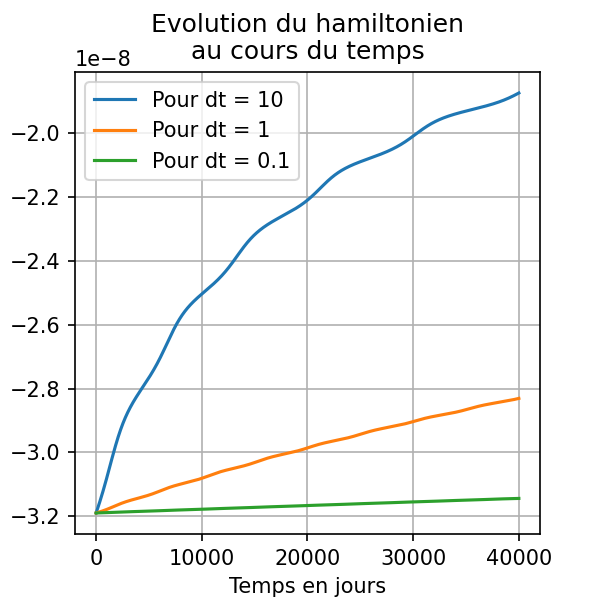

In [9]:
H_1, H_2, H_3 = [], [], []
figure_8 = plt.figure(figsize=[4, 4])
for t in range(0, len(t_explicit_1)):
    H_1.append(H(x_explicit_1[:, t]))
for t in range(0, len(t_explicit_2)):
    H_2.append(H(x_explicit_2[:, t]))
for t in range(0, len(t_explicit_3)):
    H_3.append(H(x_explicit_3[:, t]))
plt.plot(t_explicit_1, H_1, label="Pour dt = 10")
plt.plot(t_explicit_2, H_2, label="Pour dt = 1")
plt.plot(t_explicit_3, H_3, label="Pour dt = 0.1")
plt.xlabel("Temps en jours")
plt.ylabel("Hamiltonien du système")
plt.title("Evolution du hamiltonien\nau cours du temps")
plt.legend()
plt.grid()
plt.show()

*__Le hamiltonien du système n'est effectivement pas constant au cours du temps, comme le montre le graphique précédent. Ici réduire le pas de temps permet bien de réduire l'écart du hamiltonien mais ne l'empêche pas d'augmenter.__*

*__La méthode implémentée n'est donc pas cohérente et satisfaisante du point de vue numérique. Elle peut fournir quelques approximations si le pas de temps est suffisamment petit, mais cela a de fortes répercussions sur le temps de calcul.__*

Euler symplectique
==============

On cherche maintenant un schéma plus adapté. Pour cela, nous allons chercher un schéma, dit *symplectique*.

 
Notons d'abord qu'en définissant la matrice par blocs
$$
S = \left(
\begin{matrix}
0 & I_d \\
-I_d & 0
\end{matrix}
\right) \in \mathbb{R}^{2d\times 2d}
$$
la dynamique se réécrit
$$
\dot{x} = 
\left(
\begin{matrix}
f_q(p)\\
f_p(q)
\end{matrix}
\right)
= f(x) = S \ \nabla H(x) \ .
$$

**Question 5 :** Pour $d=1$, $x_a=(q_a,p_a)\in \mathbb{R}^2$ et $x_b=(q_b,p_b)\in \mathbb{R}^2$, justifier que $x_a^\top S x_b$ représente l'aire orientée du parallélogramme généré par $x_a$ et $x_b$.

On étend cette définition au cas $d>1$, où $x_a^\top S x_b$ avec $x_a,x_b\in \mathbb{R}^{2d}$ représente alors la somme des aires orientées des projections orthogonales sur chaque plan $(q_i,p_i)$ du parallélogrammes généré dans $\mathbb{R}^{2d}$ par $x_a,x_b$. Une transformation $C^1$ $\phi : \mathbb{R}^{2d}\to \mathbb{R}^{2d}$ est alors dite *symplectique*  si sa matrice jacobienne conserve l'aire, c'est-à-dire si
$$
J_\phi(x_a)^\top S J_\phi(x_b) = S \qquad \forall x_a,x_b\in \mathbb{R}^{2d}
$$



**Réponse :** 
On peut calculer :
$$
\begin{pmatrix}
q_a & p_a 
\end{pmatrix}
\times 
\begin{pmatrix} 
0 & I_d \\ 
-I_d & 0 
\end{pmatrix}
\times
\begin{pmatrix}
q_b \\
p_b
\end{pmatrix}
= 
\begin{pmatrix}
-p_a & q_a
\end{pmatrix}
\times
\begin{pmatrix}
q_b \\
p_b
\end{pmatrix}
$$
$$
= q_ap_b - p_aq_b
$$
$$
= \begin{vmatrix}
q_a & q_b \\
p_a & p_b
\end{vmatrix}
$$
$$
= \begin{vmatrix}
x_a & x_b
\end{vmatrix}
$$

Et l'aire orienté d'un parallélogramme décrit par 2 vecteur  $x_a$ et $x_b$ équivaut au déterminant de ces 2 vecteurs.

**Question 5 (Bonus)** Pour $t\in \mathbb{R}$, on définit le flot $\varphi_t : \mathbb{R}^{2d}\to \mathbb{R}^{2d}$ tel que $\varphi_t(x_0)$ donne la valeur au temps $t$ de la solution initialisée en $x_0$ à $t=0$. Montrer que pour un système hamiltonien, le flot est symplectique (Poincaré 1899). *Indice : montrer que $\frac{d}{dt} J_{\varphi_t}(x_a)^\top S J_{\varphi_t}(x_b)=0$.*

**Réponse :** On a $\varphi_t(x_0)$ qui vérifie :
$$
\left\{
\begin{array}{rcl} \begin{align}
\frac{d\varphi_t(x_0)}{dt} &= f(\varphi_t(x_0))\\
\varphi_0(x_0) &= x_0
\end{align} \end{array}
\right.
\qquad \qquad
$$

On suppose que $\varphi_t(x_0)$ est $\mathcal{C}^\infty$.
Il est donc licite de dériver $\varphi_t(x_0)$ par rapport à $x$. Ainsi en utilisant les équations ci-dessus :

$$
\frac{\partial^2\varphi_t(x_0)}{\partial{x_0 t}} = \frac{\partial{f(\varphi_t(x_0))}}{\partial{x_0}}\frac{\partial\varphi_t(x_0)}{\partial{x_0}}
$$
\
D'après le théorème de Schwarz on a :
$$
\frac{\partial^2\varphi_t(x_0)}{\partial{t x_0}} 
= \frac{\partial^2\varphi_t(x_0)}{\partial{x_0 t}} =\frac{\partial{f(\varphi_t(x_0))}}{\partial{x_0}}\frac{\partial\varphi_t(x_0)}{\partial{x_0}}
$$

De plus : 
$$
J_{\varphi_t}(x_0) = \frac{\partial\varphi_t(x_0)}{\partial{x_0}}
$$
$$
J_f(\varphi_t(x_0)) = \frac{\partial{f(\varphi_t(x_0))}}{\partial{x_0}}
$$

Et, l'expression de $J_f$ est :

$$
 J_f = \frac{\partial f}{\partial x} = \frac{\partial S \nabla H}{\partial x} = S \; \begin{bmatrix}
\frac{\partial^2 H}{{\partial x_1}^2} & \frac{\partial^2 H}{\partial x_1\partial x_2} & \cdots & \frac{\partial^2 H}{\partial x_1\partial x_n} \\
\frac{\partial^2 H}{\partial x_2\partial x_1} & \frac{\partial^2 H}{{\partial x_2}^2} & \cdots & \frac{\partial^2 H}{\partial x_2\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 H}{\partial x_n\partial x_1} & \frac{\partial^2 H}{\partial x_n\partial x_2} & \cdots & \frac{\partial^2 H}{{\partial x_n}^2}
\end{bmatrix}
$$

La matrice ci-dessus est la matrice hessienne de $H$. \
Celle-ci, d'après le théorème de Schwarz, est symétrique, notons la W.

La matrice Jacobienne est telle que : 

$$
\left\{
\begin{array}{rcl} \begin{align}
\frac{\partial J_{\varphi_t}(x_0)}{\partial t} &= J_f(\varphi_t(x_0))J_{\varphi_t}(x_0) \\
J_{\varphi_0}(x_0) &= I_{2d} 
\end{align} \end{array}
\right.
\qquad \qquad
$$

Montrons que la dérivée de $J_{\varphi_t}(x_0)^\top S J_{\varphi_t}(x_0)$ par rapport au temps est nulle : 

$$
\begin{align}
\frac{\partial J_{\varphi_t}(x_0)^\top S J_{\varphi_t}(x_0)}{\partial t} &= 
(\frac{\partial J_{\varphi_t}(x_0)^\top}{\partial t}) S J_{\varphi_t}(x) + J_{\varphi_t}(x_0)^\top S  \frac{\partial J_{\varphi_t}(x_0)}{\partial t}  \\
&= \big(J_f(\varphi_t(x_0))J_{\varphi_t}(x_0)\big)^\top S J_{\varphi_t}(x_0) + J_{\varphi_t}(x_0)^\top S J_f(\varphi_t(x_0))  J_{\varphi_t}(x_0)  \\
&\textrm{en utilisant les équations précédentes}\\
&= \big(S  W  J_{\varphi_t} \big) ^\top S J_{\varphi_t}
+J_{\varphi_t}^\top SS W J_{\varphi_t} \\ 
&= J_{\varphi_t} ^\top W^\top  S^\top S J_{\varphi_t}
- J_{\varphi_t}^\top W J_{\varphi_t}  \\
&\textrm{car $S^\top = -S$ et $SS= -I_d$}\\
&=J_{\varphi_t} ^\top W J_{\varphi_t}
- J_{\varphi_t}^\top W J_{\varphi_t} \\
&\textrm{car $W$symétrique} \\
&= 0
\end{align}
$$

Or  
$$
J_{\varphi_0}(x_0)^\top S J_{\varphi_0}(x_0) = I^\top S I = S ~~~~ à~~t=0
$$ 
d'après les conditions initiales 
\
\
Ainsi pour tout t 
$$
J_{\varphi_t}(x_0)^\top S J_{\varphi_t}(x_0)  = S
$$

Le flot est donc symplectique pour un système hamiltonien.

En d'autres termes, si l'on suit comment se déforme au cours du temps un ensemble de conditions initiales, on verra que l'ensemble se déforme mais conserve son aire. Le problème c'est que les schémas numériques usuels (dont les schémas d'Euler implicite et explicite) ne garantissent pas cette conservation. 

Considérons plutôt les schémas suivants, appelés *Euler Symplectiques*, qui ''mélangent'' les schémas d'Euler implicites et explicites :
$$
(A)
\left\{
\begin{array}{rcl}
q^{j+1} &=& q^{j} + \Delta t \, f_q(p^{j}) \\
p^{j+1} &=& p^{j} + \Delta t \, f_p(q^{j+1})
\end{array}
\right.
\qquad \text{ou} \qquad
(B)
\left\{
\begin{array}{rcl}
q^{j+1} &=& q^{j} + \Delta t \, f_q(p^{j+1}) \\
p^{j+1} &=& p^{j} + \Delta t \, f_p(q^{j})
\end{array}
\right.
$$

**Question 6** Réécrire un de ces schémas sous la forme $x^{j+1}=\Phi(x^j)$, pour $x^j=(q^j,p^j)$ et vérifier que $\Phi$ est symplectique. Justifier que ce schéma est toujours d'ordre 1.

**Réponse :** Pour le schéma A on a : 
$
x^{j+1}=x^{j}+\Delta{t}\begin{pmatrix}
f_q(p^{j})
\\
f_p(q^{j+1})
\end{pmatrix}
$

i.e $x^{j+1}=x^{j}+\Delta{t}\Phi(t_j, x^j, \Delta t_j) ~~~avec~~~
\Phi(t_j, x^j, \Delta t_j)=
\begin{pmatrix}
f_q(p^{j})
\\
f_p(q^{j+1})
\end{pmatrix}$

Ainsi
$
\Phi(t_j, x^j, \Delta t_j) = \begin{pmatrix}f_q(p^{j})
\\f_p(q^j + \Delta t \, f_q(p^{j}))\end{pmatrix}
$

En passant à la limite lorsque $ \Delta t $ tend vers 0 on obitent :
$$
\lim\limits_{\Delta t \to 0} \Phi(t_j, x^j, \Delta t_j) =  \begin{pmatrix}f_q(p^{j})\\f_p(q^j)\end{pmatrix} = f(t_j, x^j)
$$
Finalement $ \Phi(t, x, 0) = f(t,x)$.\
Le schéma A est donc consistant.

On peut vérifier par le calcul que $ J_{\Phi t}^{\top}SJ_{\Phi t} =  S$.\
Le schéma A est donc symplectique.

**Question 7** Coder ce schéma et le tester sur le système hamiltonien. Comment évolue $H$ maintenant ? Comparer aux conclusions tirées pour le schéma d'Euler explicite.

In [10]:
def solve_euler_symplectic(fq, fp, x0, dt, t0, tf):
    ts, xs = [t0], [x0]
    q, p = x0[:d], x0[d:]
    while ts[-1] < tf:
        prochain_q = q + fq(p) * dt
        prochain_p = p + fp(prochain_q) * dt
        ts.append(dt + ts[-1])
        xs.append(np.concatenate([prochain_q, prochain_p]))
        q, p = prochain_q, prochain_p
    return (np.array(ts), np.array(xs).T)

*__Implémentons cette méthode symplectique pour le système solaire :__*

<IPython.core.display.Javascript object>


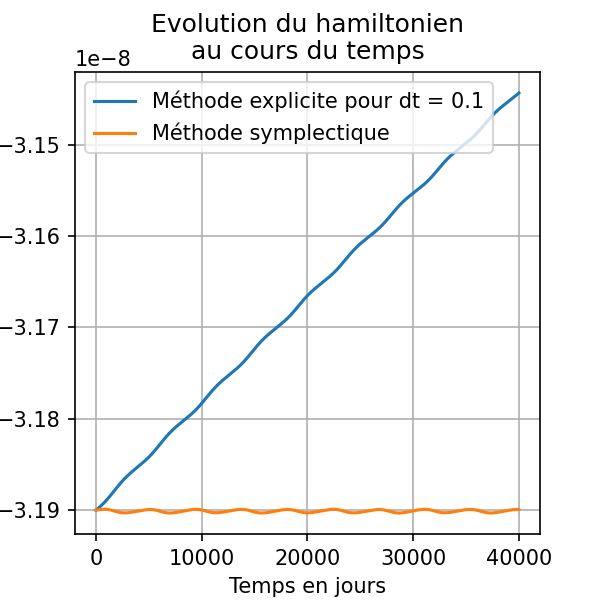

In [11]:
dt = 1
t_symplectic, x_symplectic = solve_euler_symplectic(fq, fp, x0, dt, t0, tf)

H_symplectic = []
for t in range(0, len(t_symplectic)):
    H_symplectic.append(H(x_symplectic[:, t]))

figure_9 = plt.figure(figsize=[4, 4])
plt.plot(t_explicit_3, H_3, label="Méthode explicite pour dt = 0.1")
plt.plot(t_symplectic, H_symplectic, label="Méthode symplectique")
plt.xlabel("Temps en jours")
plt.ylabel("Hamiltonien du système")
plt.title("Evolution du hamiltonien\nau cours du temps")
plt.legend()
plt.grid()
plt.show()

*__Le hamiltonien varie effectivement beaucoup moins au cours du temps et reste autour d'une certaine moyenne, ce qui peut garantir une évolution des trajectoires plus proche de la réalité, allons le vérifier :__*

<IPython.core.display.Javascript object>


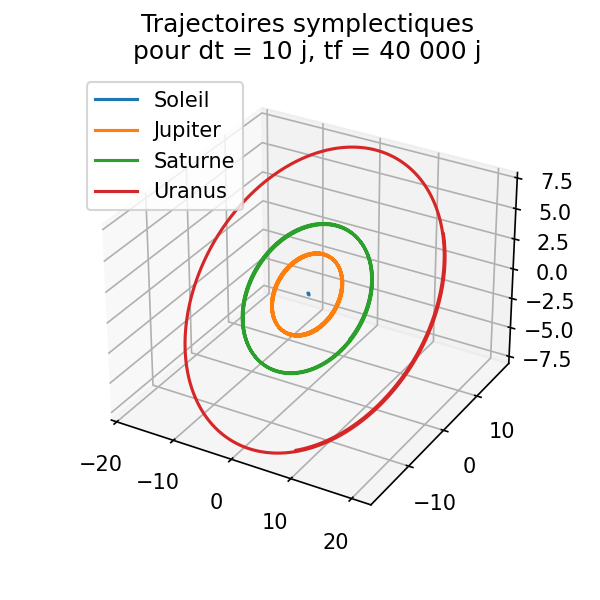

<IPython.core.display.Javascript object>


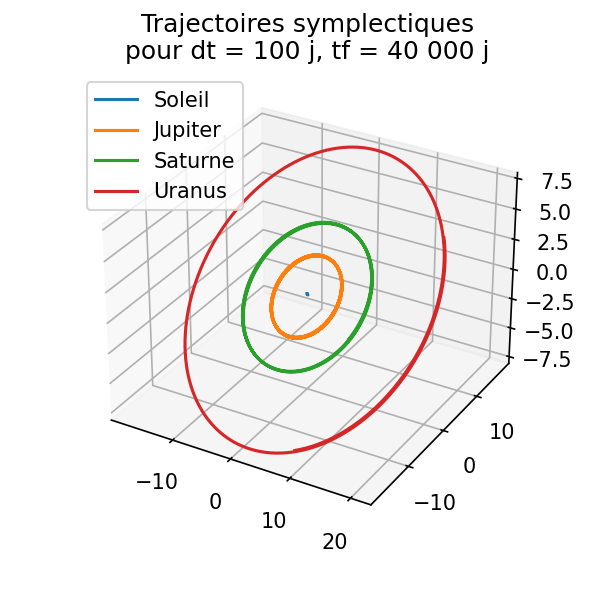

<IPython.core.display.Javascript object>


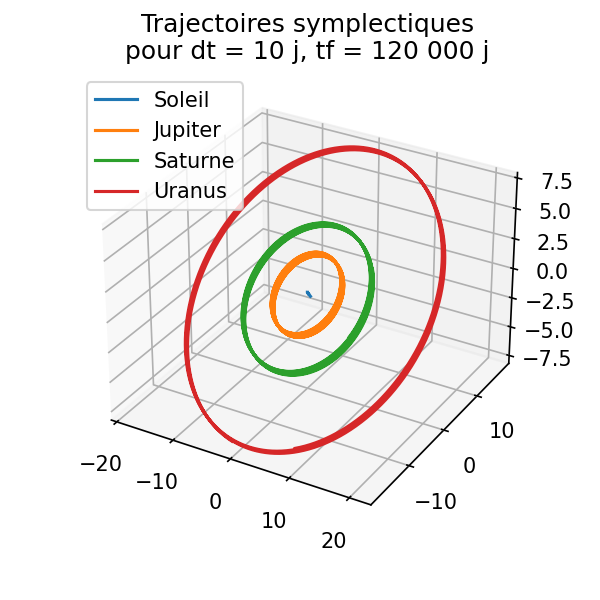

In [12]:
figure_10 = plt.figure(figsize=[4, 4])
t_symplectic_7, x_symplectic_7 = solve_euler_symplectic(fq, fp, x0, 10, t0, 40000)
ax = figure_10.add_subplot(projection="3d")
ax.plot3D(*x_symplectic_7[0:3], label="Soleil")
ax.plot3D(*x_symplectic_7[3:6], label="Jupiter")
ax.plot3D(*x_symplectic_7[6:9], label="Saturne")
ax.plot3D(*x_symplectic_7[9:12], label="Uranus")
ax.set_title("Trajectoires symplectiques\npour dt = 10 j, tf = 40 000 j")
plt.legend()
plt.show()

figure_11 = plt.figure(figsize=[4, 4])
t_symplectic_8, x_symplectic_8 = solve_euler_symplectic(fq, fp, x0, 100, t0, 40000)
ax = figure_11.add_subplot(projection="3d")
ax.plot3D(*x_symplectic_8[0:3], label="Soleil")
ax.plot3D(*x_symplectic_8[3:6], label="Jupiter")
ax.plot3D(*x_symplectic_8[6:9], label="Saturne")
ax.plot3D(*x_symplectic_8[9:12], label="Uranus")
ax.set_title("Trajectoires symplectiques\npour dt = 100 j, tf = 40 000 j")
plt.legend()
plt.show()

figure_12 = plt.figure(figsize=[4, 4])
t_symplectic_9, x_symplectic_9 = solve_euler_symplectic(fq, fp, x0, 10, t0, 120000)
ax = figure_12.add_subplot(projection="3d")
ax.plot3D(*x_symplectic_9[0:3], label="Soleil")
ax.plot3D(*x_symplectic_9[3:6], label="Jupiter")
ax.plot3D(*x_symplectic_9[6:9], label="Saturne")
ax.plot3D(*x_symplectic_9[9:12], label="Uranus")
ax.set_title("Trajectoires symplectiques\npour dt = 10 j, tf = 120 000 j")
plt.legend()
plt.show()

*__En comparaison avec les conclusions de la méthode d'Euler explicite, la méthode symplectique conserve bien mieux le hamiltonien, et les orbites des planètes considérées. Elle est de plus bien moins sensible aux variations de pas de temps, et moins sensible aux variations de temps final.__*

*__Pour la simulation des systèmes physiques hamiltoniens comme le système solaire, la méthode symplectique semble bien plus adaptée.__*

**Question 8 (BONUS)** On considère enfin la célèbre méthode de Störmer-Verlet
\begin{align*}
p^{j+1/2} &= p^{j} + \frac{\Delta t}{2} \, f_p(q^{j})\\
q^{j+1} &= q^{j} + \Delta t \,  f_q(p^{j+1/2}) \\
p^{j+1} &= p^{j+1/2} + \frac{\Delta t}{2} \, f_p(q^{j+1})
\end{align*}
construite à partir de la composition des deux schémas d'Euler symplectiques (A) et (B) ci-dessus. Justifier qu'elle est toujours symplectique mais qu'elle est maintenant d'ordre 2. Appliquer cette méthode au système hamiltonien et comparer les performances.

In [13]:
def solve_euler_symplectic_SV(fq, fp, x0, dt, t0, tf):
    ts, xs = [t0], [x0]
    q, p = x0[:d], x0[d:]
    while ts[-1] < tf:
        p_intermediaire = p + dt / 2 * fp(q)
        prochain_q = q + fq(p_intermediaire) * dt
        prochain_p = p_intermediaire + fp(prochain_q) * dt / 2
        ts.append(dt + ts[-1])
        xs.append(np.concatenate([prochain_q, prochain_p]))
        q, p = prochain_q, prochain_p
    return (np.array(ts), np.array(xs).T)

In [14]:
dt, tf = 1, 40000
t_symplectic_SV, x_symplectic_SV = solve_euler_symplectic_SV(fq, fp, x0, dt, t0, tf)

<IPython.core.display.Javascript object>


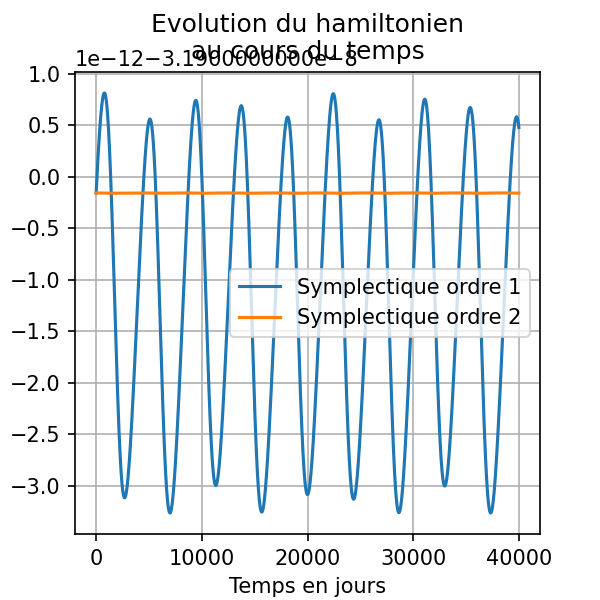

In [18]:
H_symplectic_SV = []
for t in range(0, len(t_symplectic_SV)):
    H_symplectic_SV.append(H(x_symplectic_SV[:, t]))

figure_13 = plt.figure(figsize=[4, 4])
plt.plot(t_symplectic, H_symplectic, label="Symplectique ordre 1")
plt.plot(t_symplectic, H_symplectic_SV, label="Symplectique ordre 2")
plt.xlabel("Temps en jours")
plt.ylabel("Hamiltonien du système")
plt.title("Evolution du hamiltonien\nau cours du temps")
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


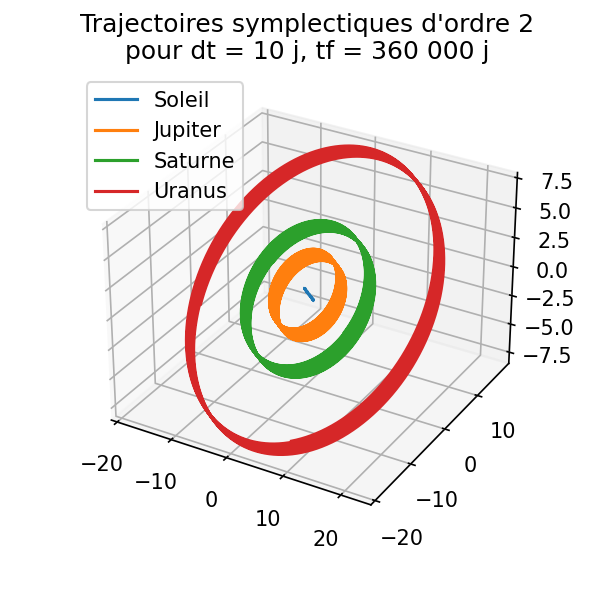

In [16]:
figure_14 = plt.figure(figsize=[4, 4])
t_symplectic_9, x_symplectic_9 = solve_euler_symplectic(fq, fp, x0, 10, t0, 360000)
ax = figure_14.add_subplot(projection="3d")
ax.plot3D(*x_symplectic_9[0:3], label="Soleil")
ax.plot3D(*x_symplectic_9[3:6], label="Jupiter")
ax.plot3D(*x_symplectic_9[6:9], label="Saturne")
ax.plot3D(*x_symplectic_9[9:12], label="Uranus")
ax.set_title("Trajectoires symplectiques d'ordre 2\npour dt = 10 j, tf = 360 000 j")
plt.legend()
plt.show()

*__La méthode de Störmer-Verlet conserve bien mieux le hamiltonien que la méthode d'Euler symplectique de base, l'ensemble des valeurs prises est réduit. Ceci garantie une meilleure contrôle de l'évolution sur des temps longs.__*